*Keep in mind while writing up:*

- *Be concise! Less is more - the fully story is in the source code for those interested.*
- *Be deliberate about: What to highlight in which section (e.g., “this dataset was special due to its high number of variables”…)*
- *Work with visuals and only exceptionally with code. Refer to GitHub, dump code there, the technical people will go there. And (hiring) managers will only read the write-up.*
- *Optimize business value, not model performance! Time/Resource constraints, ….*

### Project Report
# **Preventing Customer Churn with Artificial Neural Networks**
*Disclaimer: This mock project report serves educational purposes only. The data is public (https://www.kdd.org/kdd-cup/view/kdd-cup-2009/Data). The author has no relationship with mentioned parties.* 
***
### **Executive Summary (max. 7 sentences)**
Situation (1 sentence based on 1.)
<br>
Complication (1 sentence based on 1.)
<br>
Solution (1 sentence based on 2.)
<br>
Recommendations including Solutions' Business Value Add (1-3 sentences based on 3.)
"much buzz around ANN, let's test that here"
***
### **Report Structure**
[Include nice + simple process visualization!]
1. Business Problem Statement
2. Technical Solution
<br>    *2.1. Technical Problem Statement*
<br>    *2.2. Exploratory Data Analysis*
<br>    *2.3. Data Preprocessing*
<br>    *2.4. Model Selection (incl. Optimization)*
<br>    *2.5. Final Model Evaluation*
<br>    *2.6. Future Optimization Potentials*
3. Business Recommendations
***

## **1. Business Problem Statement**
For French telecommunication provider Orange, customer retention is critical. This is because retaining customers is much cheaper than the alternative: losing a customer and their revenues *plus* having additional costs for acquiring a new customer. However, Orange lacks an automated, scalable, and data-driven method for predicting customer churn that would allow Orange to initiate retention measures before customers leave. Thus, Orange requested a proof-of-concept for a predictive model that can help identify customers who will likely churn. More specifically, given their widely reported success, Orange is interested in exploring the potential of "deep learning" models. 

## **2. Technical Solution**
- for visualization inspirations see here: https://towardsdatascience.com/predict-customer-churn-the-right-way-using-pycaret-8ba6541608ac


### *2.1. Technical Solution: Technical Problem Statement*
The business problem, as put by our client Orange, is "to predict customer churn". This problem requires translation into a better specified, technical problem to be solvable using mathematical-statistical methods.

#### Problem understanding
Hereto, it is first important to understand that the problem we solve is a binary classification problem: given the data available for any particular customer (e.g., age, gender, purchased services, average call duration), we want our model to assign this customer to one of the two classes "churn"/"no churn". Understanding that we solve a classification problem has important implications for two main elements of the technical problem statement:

#### Model class choice
In a typical data science project, we would train models from many different model classes (e.g., logistic regression classifiers, trees, support vector machines) and select the best performing models (or a combination of them in an *ensemble*) for deployment. In this project, however, the client Orange has specified upfront that they want a "deep learning" model, which in more precise technical terms is widely understood as an artificial neural network (ANN) with more than one hidden layer. Since we want the ANN's output to always be either "churn" or "no churn", its output layer must contain a single neuron with an activation function (e.g., ReLU, sigmoid) able to translate continuous into binary values (1/0).

#### Evaluation metric choice
An evaluation metric enables us to assess how "good" a developed model is and optimize it. The perhaps most intuitive metric for a classification model is the *accuracy* of its predictions. Accuracy tells us in which percentage of cases a classification model's predictions ("churn"/"no churn") are true (that is, correctly predict what customers will actually do). However, we can infer from the business context that the classes "churn"/"no churn" we are interested in are *imbalanced*: only a minority of all customers will churn in any given time period. We can thus expect many more customers to be in the "no churn" rather than the "churn" class. Accuracy will thus be a bad metric to optimize: the model could 'cheat' and predict "no churn" in 100% of the cases, and never detect a single churning customer, and still have awesome accuracy. In presence of class imbalance, a metric more adequate to optimize is the *F1-score*. A high F1-score indicates not only that the model is able to detect many of those customers who will indeed churn, but also that the model's "churn"-predictions are typically correct (two different things!).   


#### > Technical Problem Statement
Understanding the problem type, choosing adequate model class(es), and deciding on adequate evaluation metrics much helps us specify the technical problem we solve: *maximize the F1-score over the churn predictions of Orange's customers by implementing an artificial neural network with more than one hidden layer and an output layer containing a single neuron with a binary activation function*. 
 

Resources used:
- Data: Orange has provided historical customer data (50,000 observations/customers; 230 features) for model optimization, selection, and evaluation. 
- Software: Python 3.8.5., main packages:
    - Pandas, Numpy (for data wrangling)
    - Keras/TensorFlow (for neural network modelling)
    - Scikit-learn (for optimization/gridsearch automation)
    - Matplotlib, Seaborn (for visualization)
- Hardware: standard enduser office notebook (i7-8550U; 4 cores @1.80 GHz)

Deliverable:
-  source code in Python that can serve as proof of concept before deploying and putting into production (check vocabulary; for containerization also check this: https://github.com/Azure-Samples/MachineLearningSamples-TDSPUCIAdultIncome/blob/master/docs/deliverable_docs/ProjectReport.md)

### *2.2. Technical Solution: Exploratory Data Analysis (EDA)*
Now that we know precisely which technical problem we solve in this project, we familiarize ourselves a bit better with the historical customer data Orange has provided. This exploratory data analysis helps us identify how we need to preprocess the data so that the ANN will be able to best exploit it for churn prediction. This typically involves some basic overall checks (overall dataset structure, feature types, missing values), but also analyses more focused on our target variable (= what we want to predict), that is, the class label vector "churn"/"no churn".

#### Load data

In [6]:
import pandas as pd
data = pd.read_table('data/orange_small_train.data')
data_labels = pd.read_table('data/orange_small_train_churn.labels', header=None, names=['Churn'])

#### Overall analyses

In [7]:
data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 230 entries, Var1 to Var230
dtypes: float64(191), int64(1), object(38)
memory usage: 87.7+ MB


#### Check missing values (percentage)

In [31]:
data.isna().sum().sum()/(data.shape[0]*data.shape[1])

0.697752347826087

<BarContainer object of 230 artists>

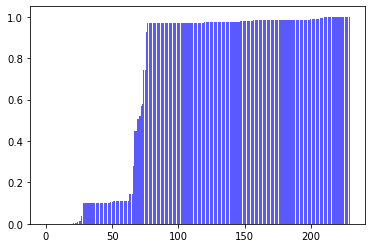

In [30]:
import matplotlib.pyplot as plt
temp = data.isna().sum()/(data.shape[0])
plt.bar(range(len(temp)), sorted(temp), color='blue', alpha=0.65)



#### Target variable analyses



#### > Key insights from EDA:

- explicit ANN data requirements; EDA (= departing from that + nice visualizations of basic dataset properties)
- highlight peculiarity of dataset: MANY NaNs, will be main challenge to handle these in a way not compromising churn predictions
- varibles are anonymized
- missing values/sparsity
- class balance
-  


### *2.3. Technical Solution: Data Preprocessing*
(e.g., data cleaning (data types, missing value handling), feature engineering, feature selection, dimensionality reduction, variable encoding, normalization, resampling...)

- proceed from EDA main findings
- optimization: "Optimization of only thought about in terms of tuning hyperparamters; but also preprocessing includes many steps that can be done in different ways - meaning also has potential to optimize: read following in conjunction with "diary" to see what I have optimzied here and with which success: <br>
 - (X) Dropping all columns which have more than 80% missing values
 - (X) Increase test set size to 20%
 - (X) Do not resample at all but work with class weights
 - (X) NaN handling: try in addition to creating binary indicator variables per column
 - (X) impute with column-wise median
 - (X) impute with column-wise mode (in most cases this equals a zero imputation)
 - (X) impute with column-wise minimum
 - (X) impute with column-wise maximum
 - (X) impute with column-wise NaN frequency
 - Feature Engineering:
   - (X) DO NOT create binary indicator variables per column to indicate NaNs
   - add column containing rows' NaN frequencies
 - Remove outliers (before norm/stand)
 - go from feature normalization to Standardization, mind sparsity
   - (X) MinMax (wie in v1, nur jetzt über SKlearn Method statt manuell, daher zum Test reproduziert; diesen Schritt jetzt auch erst nach Splitting eingebaut)
   - (X) RobustScaler
   - (X) PowerTransformer
 - (X) Train and Reduce dimensionality (e.g., PCA); feature
 selection would have benefit to be explanable, however, features
 anonymized anyways



### *2.4. Technical Solution: Model Selection (incl. Optimization)*
(Model Choice, Training, Validation, Optimization)
split dataset, choose/apply model, compile/train models, optimize model (gridsearch, cross-validation, stratified y/n, ...)

pick best model that comes out of gridsearch and train on entire dataset (while during gridsearch has been trained only on fraction while validation data had been held out)

- specify neural network as "Feed-forward neural network" - why not recurrent, LSTM that can loop/have memory -given goal in this project is to probe the hypoe around "deep learning", unnecessary complexity
- in write-up: reflect on fact neural networks / deep learning seem to be overhyped
- see e.g.: Peter Roßbach: "Neural Networks vs. Random Forests – Does it always have to be Deep Learning?
- - make that explicit point of the write-up! "test" that!
- show here that I know how to work with learning curves

when looking at results, come back to earlier point, explain via clas imbalance
come back to earlier point: 
- make it one main technical point in the article that high accuracy can be misleading (when? why?) - have to also check other measures
- - includein write-up my reflections for using precision/recall instead of AUC (argue by importance to detect minority class relative to importance of TPs and FPs) (expl in simple language)

### *2.5. Technical Solution: Final Model Evaluation*
Model Evaluation on 'Unseen' Data (simulate by priorly held out 'Test Data')
- Do the results make sense?

- show/compare how accuracy can be misleading

### *2.6. Technical Solution: Future Optimization Potentials*
(hier sammeln alles ich zeitlich nicht geschafft hab, aber für wichtig halte - um Kritik zu preempten)

Schema: Potential - Umsetzungsaufwand - erwarteter Umsetzungseffekt auf Business Metric

- version 2: optimization potentials (versus v1) to explore ceteris paribus:
- not explored/limitations: only individually optimized, due to constraints in processing power and time, optimization dependencies between variables neglected
- only narrow ranges in gridsearch covered, so sound change that only found local optima per parameter
- potential: NaN imputation with means on subsets of rows: one could search powerful clustering criteria first and than impute cluster means
- also: was using smaller dataset, large dataset with many more variables may allow to increase a classifier's precision/recall
- Make sure to also compare to others' results - I seem to be already working at the upper boundary of what's possible on this dataset with ANNs!
- optimization potential: in practice, one would normally traing many different models and select/stack the best; show somehow that I'm aware of that
- (optimization potential: add and compare AUC: simple logistic regression, random forest, 'flat' neural network, XGBoost)
- optimization potential: put data into an AWS instance and run there
- multicollinearity - check whether an issue - we want to have model as simple as possible!


## **3. Business Recommendations**
"What do the generated insights/model urge us/allow us to do different next Monday, and which value (business metric!) will that generate?"

direkt aus auftrag (1.) ableiten. incl.:
- (after implementing comparative models:) "turns out, deep learning (might) not be best for this kind of problem; best practice computer vision, very large datasets; here: tree model such as XGboost or simple logistic regression better 

Good Example: https://www.kaggle.com/code/hamzaben/employee-churn-model-w-strategic-retention-plan/notebook